In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_path = "SW-Last5Years.csv"
df = pd.read_csv(file_path)


print("\n First 5 Lines:")
print(df.head())


 First 5 Lines:
         DATE  BSRN  ND   KP1   KP2   KP3   KP4   KP5   KP6   KP7  ...   CP  \
0  2020-01-01  2542  22   3.0   0.0   0.0   7.0   7.0  13.0  10.0  ...  0.0   
1  2020-01-02  2542  23   0.0   0.0   3.0   3.0   3.0   7.0  10.0  ...  0.0   
2  2020-01-03  2542  24   7.0  10.0  27.0  20.0  10.0   7.0   3.0  ...  0.2   
3  2020-01-04  2542  25  17.0   7.0   7.0   7.0  10.0  20.0  23.0  ...  0.2   
4  2020-01-05  2542  26  17.0  10.0  17.0  13.0  20.0  20.0  33.0  ...  0.4   

    C9  ISN  F10.7_OBS  F10.7_ADJ  F10.7_DATA_TYPE  F10.7_OBS_CENTER81  \
0  0.0    6       71.8       69.4              OBS                71.4   
1  0.0   12       71.9       69.5              OBS                71.4   
2  1.0   13       71.2       68.9              OBS                71.4   
3  1.0   12       72.2       69.8              OBS                71.4   
4  2.0   14       71.8       69.4              OBS                71.4   

   F10.7_OBS_LAST81  F10.7_ADJ_CENTER81  F10.7_ADJ_LAST81  
0  

In [3]:
print("\n Dataset Infos:")
print(df.info())


 Dataset Infos:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2294 entries, 0 to 2293
Data columns (total 31 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   DATE                2294 non-null   object 
 1   BSRN                2294 non-null   int64  
 2   ND                  2294 non-null   int64  
 3   KP1                 2102 non-null   float64
 4   KP2                 2102 non-null   float64
 5   KP3                 2102 non-null   float64
 6   KP4                 2102 non-null   float64
 7   KP5                 2102 non-null   float64
 8   KP6                 2102 non-null   float64
 9   KP7                 2102 non-null   float64
 10  KP8                 2102 non-null   float64
 11  KP_SUM              2102 non-null   float64
 12  AP1                 2102 non-null   float64
 13  AP2                 2102 non-null   float64
 14  AP3                 2102 non-null   float64
 15  AP4                 2102 non-null   fl

In [4]:
print("\n Descriptive Statics:")
print(df.describe().T)


 Descriptive Statics:
                     count         mean        std     min      25%      50%  \
BSRN                2294.0  2593.561465  49.624217  2542.0  2564.00  2585.00   
ND                  2294.0    14.003923   7.799185     1.0     7.00    14.00   
KP1                 2102.0    19.249286  13.486563     0.0     7.00    17.00   
KP2                 2102.0    18.430542  13.374896     0.0     7.00    17.00   
KP3                 2102.0    16.617031  12.351136     0.0     7.00    13.00   
KP4                 2102.0    16.483825  11.960847     0.0     7.00    13.00   
KP5                 2102.0    17.981446  12.490344     0.0     7.00    17.00   
KP6                 2102.0    18.297336  12.805713     0.0     7.00    17.00   
KP7                 2102.0    18.426261  13.259861     0.0     7.00    17.00   
KP8                 2102.0    19.077545  13.015795     0.0    10.00    17.00   
KP_SUM              2102.0   144.638915  82.522398     0.0    83.00   130.00   
AP1              

In [5]:
print("\n Missing Value Counts:")
print(df.isnull().sum())


 Missing Value Counts:
DATE                    0
BSRN                    0
ND                      0
KP1                   192
KP2                   192
KP3                   192
KP4                   192
KP5                   192
KP6                   192
KP7                   192
KP8                   192
KP_SUM                192
AP1                   192
AP2                   192
AP3                   192
AP4                   192
AP5                   192
AP6                   192
AP7                   192
AP8                   192
AP_AVG                192
CP                    192
C9                    192
ISN                     0
F10.7_OBS               0
F10.7_ADJ               0
F10.7_DATA_TYPE         0
F10.7_OBS_CENTER81      0
F10.7_OBS_LAST81        0
F10.7_ADJ_CENTER81      0
F10.7_ADJ_LAST81        0
dtype: int64


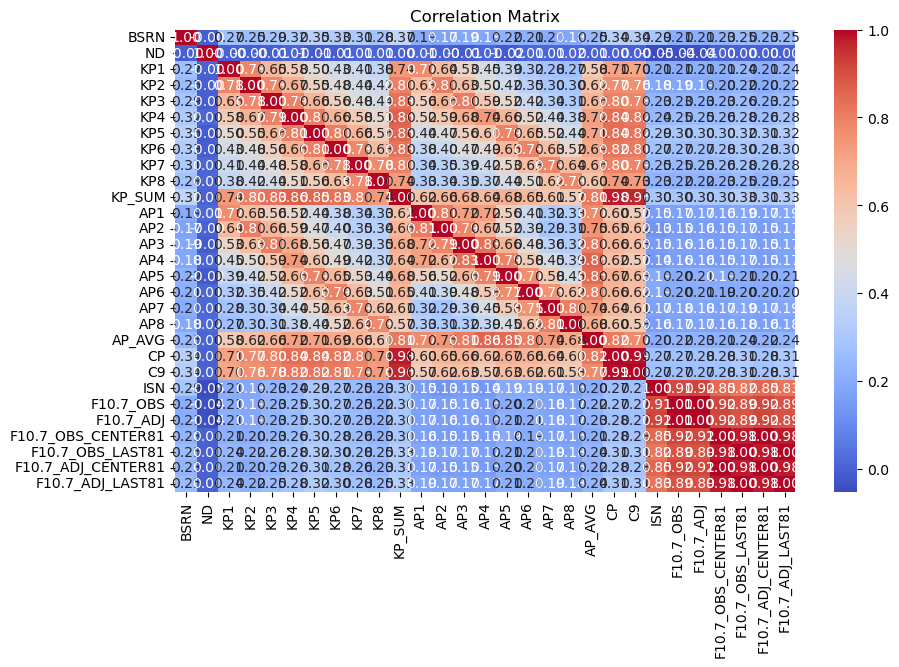

In [6]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

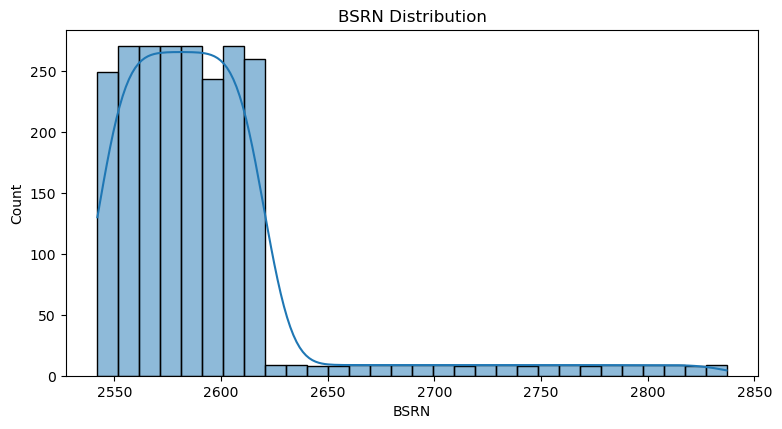

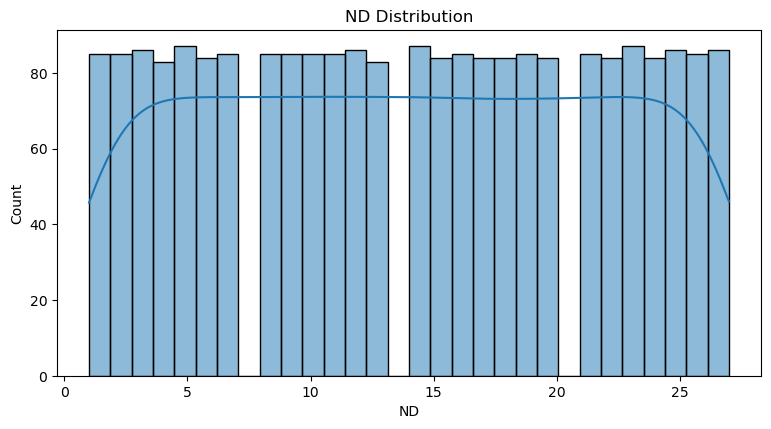

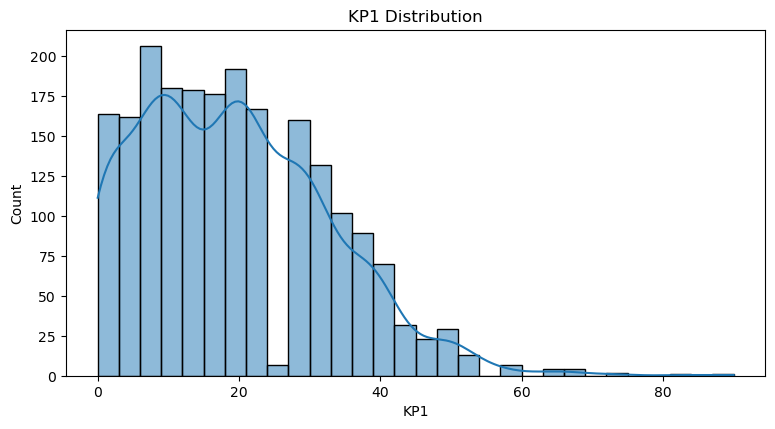

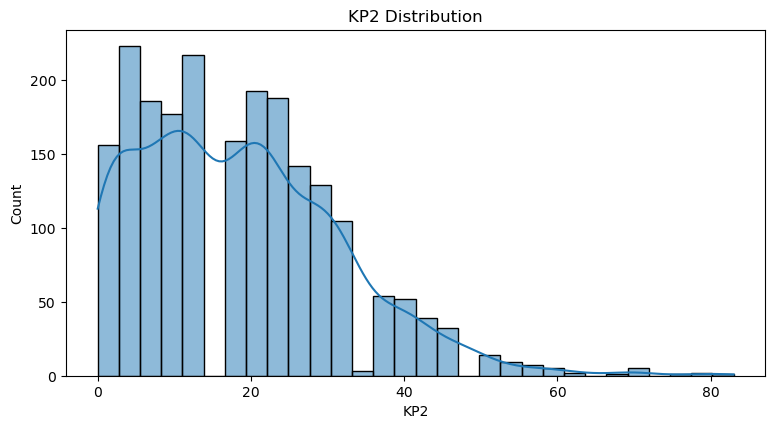

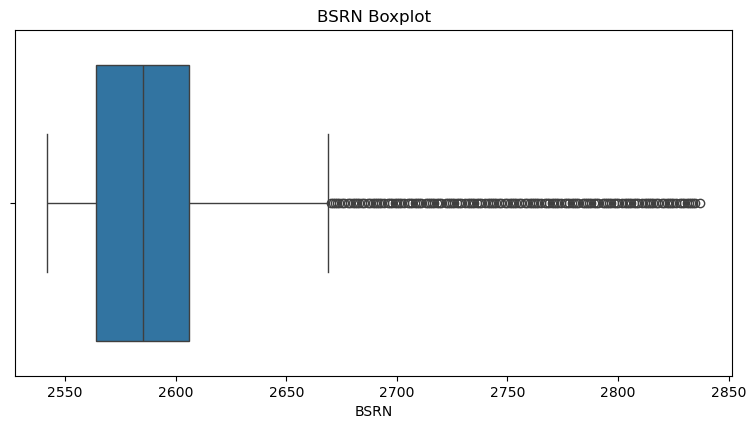

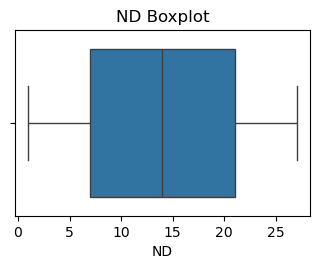

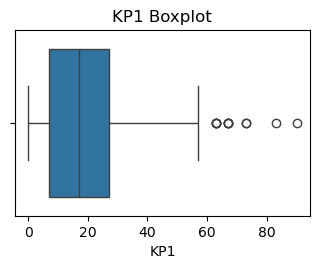

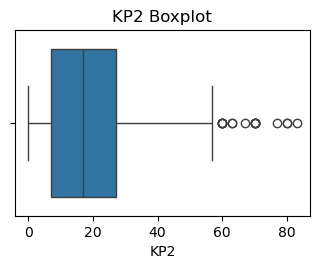

In [7]:
if 'date' in df.columns or 'Date' in df.columns:
    date_col = 'date' if 'date' in df.columns else 'Date'
    df[date_col] = pd.to_datetime(df[date_col], errors='coerce')
    df = df.sort_values(by=date_col)
    plt.figure(figsize=(12,6))
    for col in df.select_dtypes(include=['float64','int64']).columns[:3]: 
        plt.plot(df[date_col], df[col], label=col)
        plt.title("Time Series Graphs (First 3 Numerical Columns)")
        plt.xlabel("Date")
        plt.ylabel("Value")
        plt.legend()
        plt.show()


num_cols = df.select_dtypes(include=['float64','int64']).columns
plt.figure(figsize=(15,8))
for i, col in enumerate(num_cols[:4]): 
    plt.subplot(2,2,i+1)
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f"{col} Distribution")
    plt.tight_layout()
    plt.show()
    plt.figure(figsize=(15,8))
for i, col in enumerate(num_cols[:4]):
    plt.subplot(2,2,i+1)
    sns.boxplot(x=df[col])
    plt.title(f"{col} Boxplot")
    plt.tight_layout()
    plt.show()

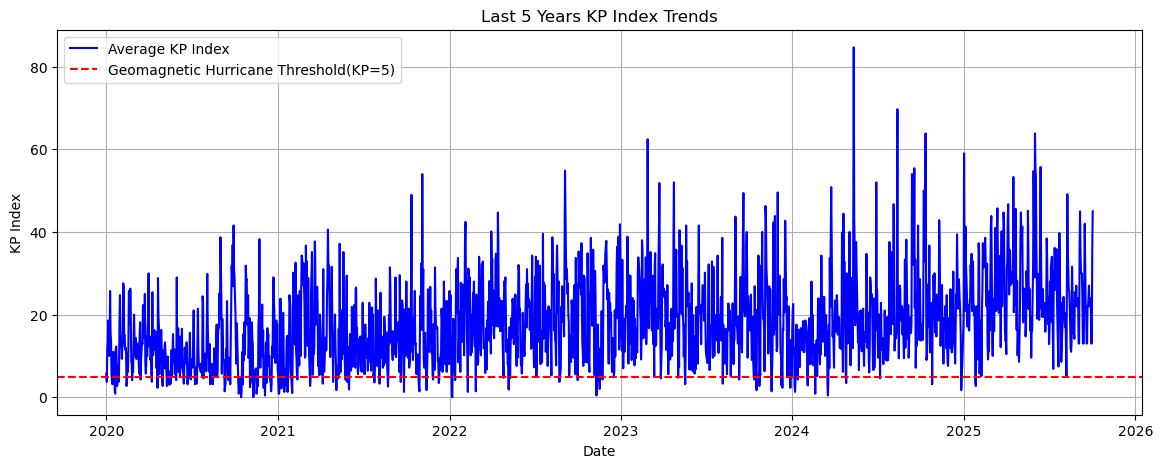

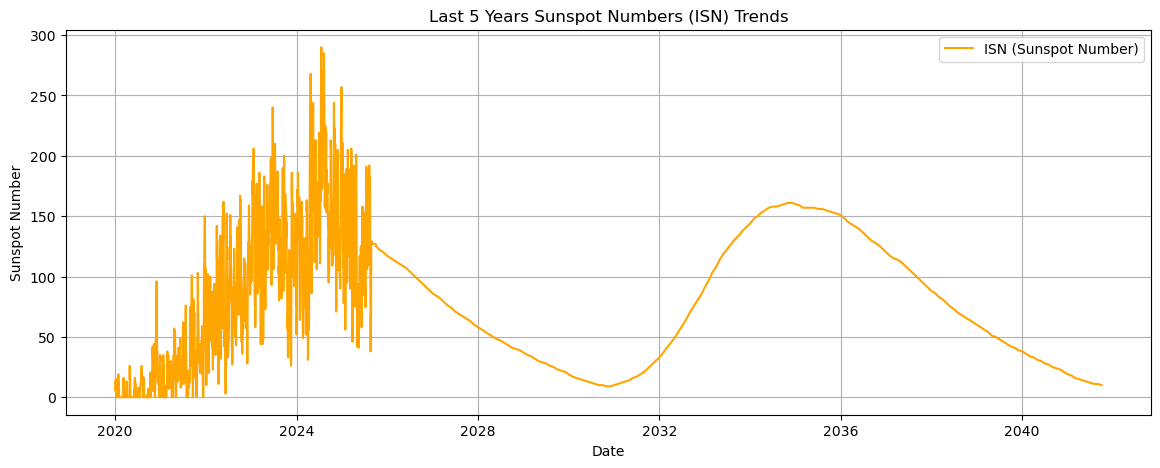

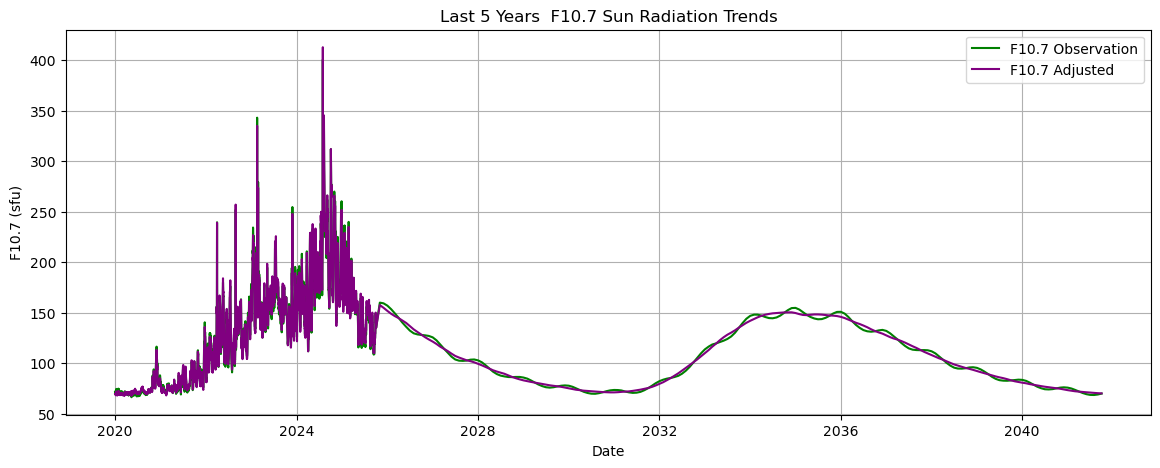

In [8]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = "SW-Last5Years.csv"
df = pd.read_csv(file_path)


df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')
df = df.sort_values('DATE')


kp_cols = ['KP1','KP2','KP3','KP4','KP5','KP6','KP7']
df['KP_MEAN'] = df[kp_cols].mean(axis=1)

#KP Index Trend Graph
plt.figure(figsize=(14,5))
plt.plot(df['DATE'], df['KP_MEAN'], color='blue', label='Average KP Index')
plt.axhline(y=5, color='red', linestyle='--', label='Geomagnetic Hurricane Threshold(KP=5)')
plt.title('Last 5 Years KP Index Trends')
plt.xlabel('Date')
plt.ylabel('KP Index')
plt.legend()
plt.grid(True)
plt.show()

#ISN (Sunspot Number) Trend Graph
plt.figure(figsize=(14,5))
plt.plot(df['DATE'], df['ISN'], color='orange', label='ISN (Sunspot Number)')
plt.title('Last 5 Years Sunspot Numbers (ISN) Trends')
plt.xlabel('Date')
plt.ylabel('Sunspot Number')
plt.legend()
plt.grid(True)
plt.show()

#F10.7 (Sun Radiation) Trend Graph
plt.figure(figsize=(14,5))
plt.plot(df['DATE'], df['F10.7_OBS'], color='green', label='F10.7 Observation')
plt.plot(df['DATE'], df['F10.7_ADJ'], color='purple', label='F10.7 Adjusted')
plt.title('Last 5 Years  F10.7 Sun Radiation Trends')
plt.xlabel('Date')
plt.ylabel('F10.7 (sfu)')
plt.legend()
plt.grid(True)
plt.show()


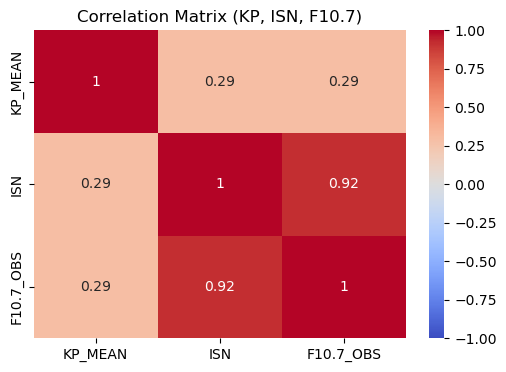

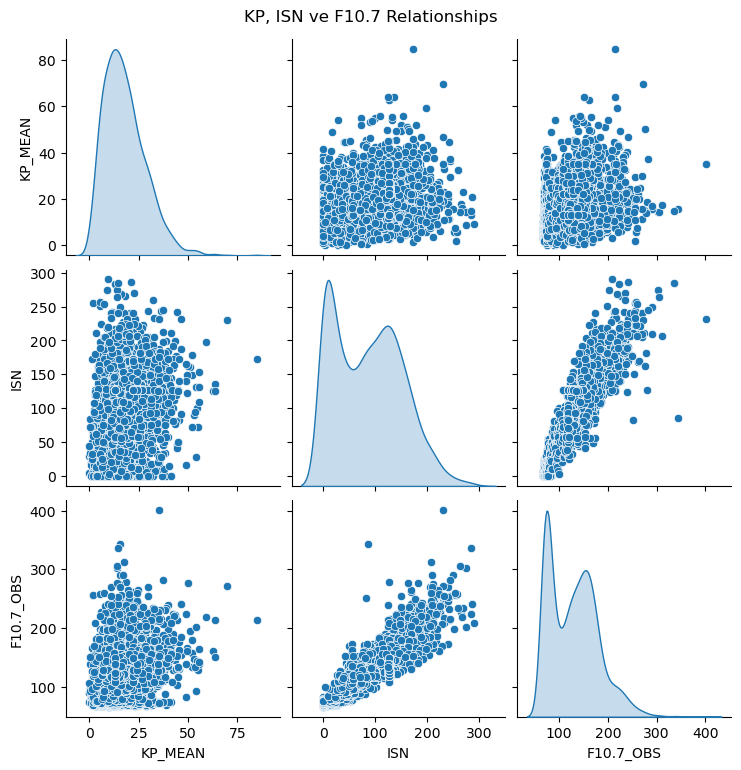

In [9]:
kp_cols = ['KP1','KP2','KP3','KP4','KP5','KP6','KP7']
df['KP_MEAN'] = df[kp_cols].mean(axis=1)


cols = ['KP_MEAN', 'ISN', 'F10.7_OBS']
data = df[cols].dropna()


plt.figure(figsize=(6,4))
sns.heatmap(data.corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix (KP, ISN, F10.7)")
plt.show()


sns.pairplot(data, vars=cols, kind="scatter", diag_kind="kde")
plt.suptitle("KP, ISN ve F10.7 Relationships", y=1.02)
plt.show()

In [10]:

kp_cols = ['KP1','KP2','KP3','KP4','KP5','KP6','KP7']
df['KP_MEAN'] = df[kp_cols].mean(axis=1)


def kp_risk(kp):
    if kp >= 5:
        return "High"
    elif kp >= 3:
        return "Average"
    else:
        return "Low"

def f107_risk(f107):
    if f107 >= 200:
        return "High"
    elif f107 >= 150:
        return "Average"
    else:
        return "Low"

def isn_risk(isn):
    if isn >= 100:
        return "High"
    elif isn >= 50:
        return "Average"
    else:
        return "Low"


df['KP_RISK'] = df['KP_MEAN'].apply(kp_risk)
df['F10.7_RISK'] = df['F10.7_OBS'].apply(f107_risk)
df['ISN_RISK'] = df['ISN'].apply(isn_risk)


risk_summary = df[['DATE','KP_RISK','F10.7_RISK','ISN_RISK']]
print(risk_summary.head(20))  


risk_mapping = {"Low":1, "Average":2, "High":3}
df['TOTAL_RISK_SCORE'] = df['KP_RISK'].map(risk_mapping) + df['F10.7_RISK'].map(risk_mapping) + df['ISN_RISK'].map(risk_mapping)


print("\n Risk Score Summary:")
print(df['TOTAL_RISK_SCORE'].describe())


         DATE  KP_RISK F10.7_RISK ISN_RISK
0  2020-01-01     High        Low      Low
1  2020-01-02  Average        Low      Low
2  2020-01-03     High        Low      Low
3  2020-01-04     High        Low      Low
4  2020-01-05     High        Low      Low
5  2020-01-06     High        Low      Low
6  2020-01-07     High        Low      Low
7  2020-01-08     High        Low      Low
8  2020-01-09     High        Low      Low
9  2020-01-10     High        Low      Low
10 2020-01-11     High        Low      Low
11 2020-01-12     High        Low      Low
12 2020-01-13  Average        Low      Low
13 2020-01-14  Average        Low      Low
14 2020-01-15     High        Low      Low
15 2020-01-16     High        Low      Low
16 2020-01-17     High        Low      Low
17 2020-01-18     High        Low      Low
18 2020-01-19      Low        Low      Low
19 2020-01-20      Low        Low      Low

 Risk Score Summary:
count    2294.000000
mean        6.215780
std         1.614936
min         

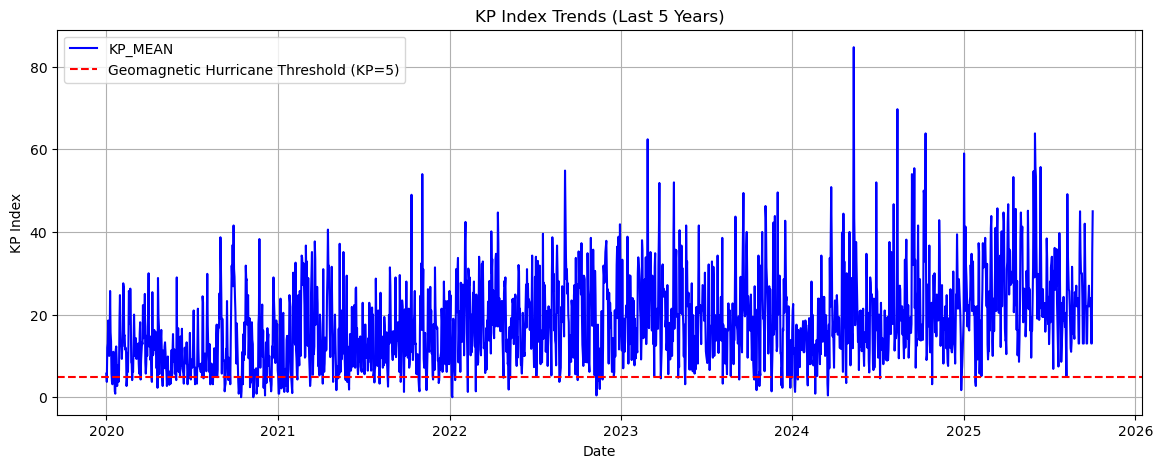

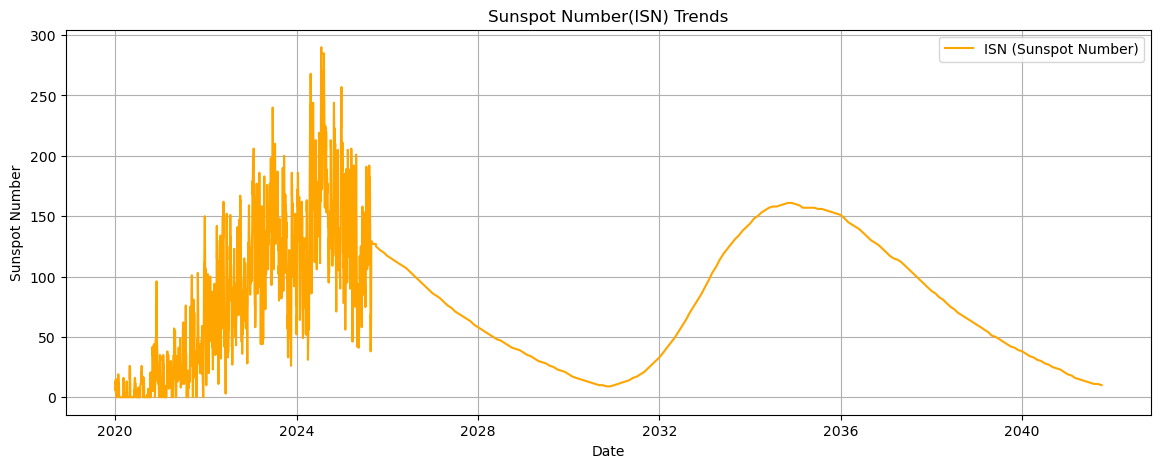

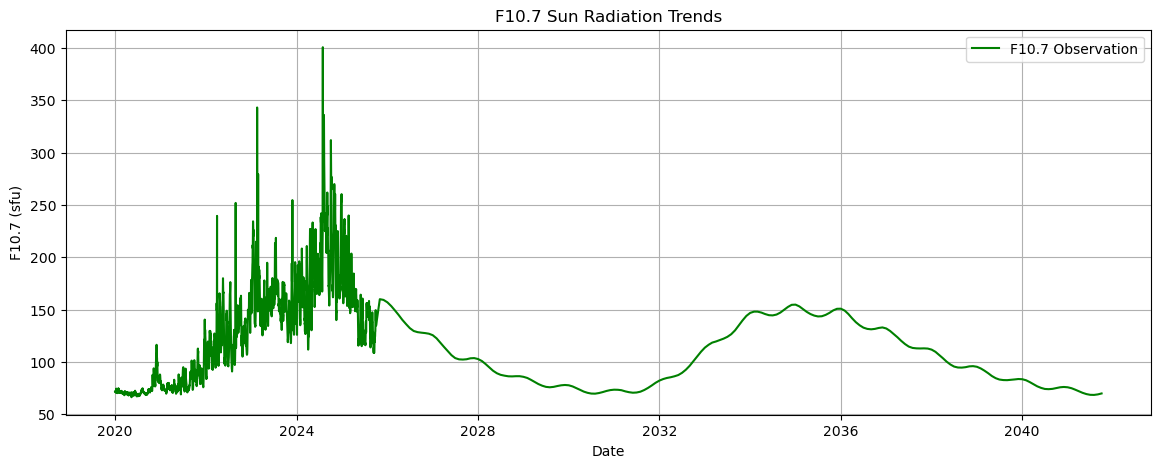

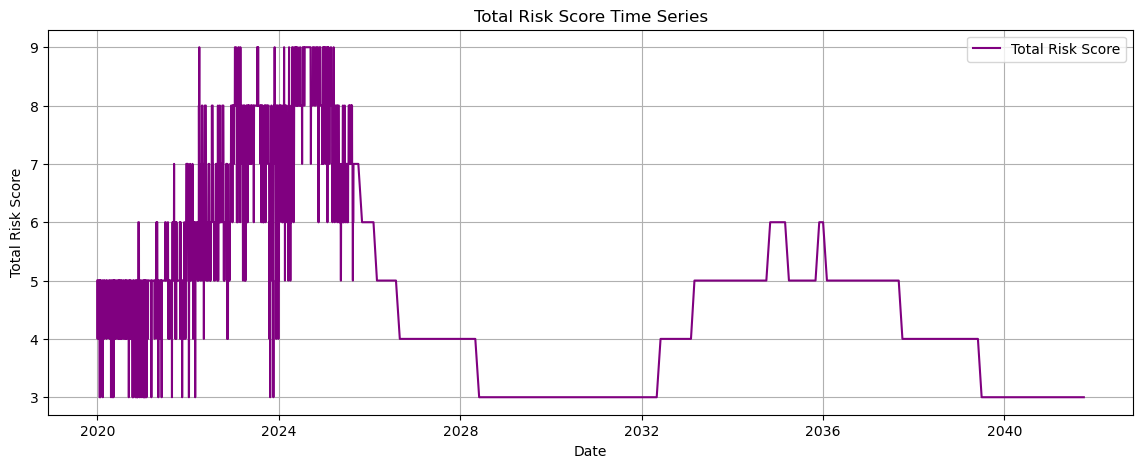

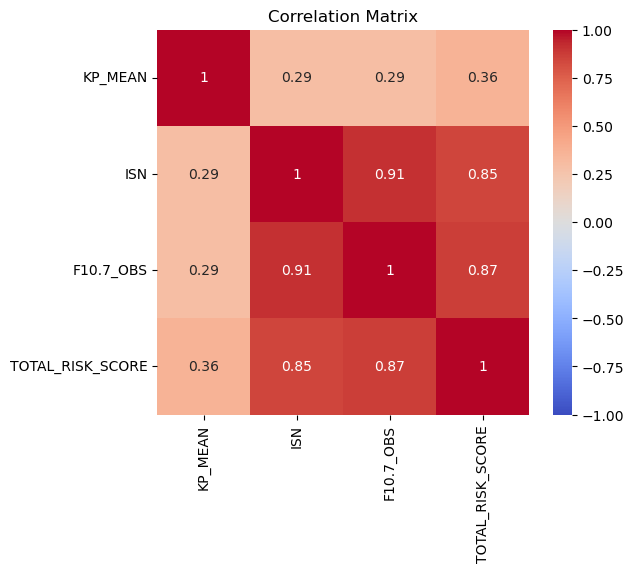

In [11]:
df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')
df = df.sort_values('DATE')


kp_cols = ['KP1','KP2','KP3','KP4','KP5','KP6','KP7']
df['KP_MEAN'] = df[kp_cols].mean(axis=1)


def kp_risk(kp):
    if kp >= 5:
        return "High"
    elif kp >= 3:
        return "Average"
    else:
        return "Low"

def f107_risk(f107):
    if f107 >= 200:
        return "High"
    elif f107 >= 150:
        return "Average"
    else:
        return "Low"

def isn_risk(isn):
    if isn >= 100:
        return "High"
    elif isn >= 50:
        return "Average"
    else:
        return "Low"


df['KP_RISK'] = df['KP_MEAN'].apply(kp_risk)
df['F10.7_RISK'] = df['F10.7_OBS'].apply(f107_risk)
df['ISN_RISK'] = df['ISN'].apply(isn_risk)


risk_mapping = {"Low":1, "Average":2, "High":3}
df['TOTAL_RISK_SCORE'] = df['KP_RISK'].map(risk_mapping) + df['F10.7_RISK'].map(risk_mapping) + df['ISN_RISK'].map(risk_mapping)


plt.figure(figsize=(14,5))
plt.plot(df['DATE'], df['KP_MEAN'], color='blue', label='KP_MEAN')
plt.axhline(y=5, color='red', linestyle='--', label='Geomagnetic Hurricane Threshold (KP=5)')
plt.title('KP Index Trends (Last 5 Years)')
plt.xlabel('Date')
plt.ylabel('KP Index')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(14,5))
plt.plot(df['DATE'], df['ISN'], color='orange', label='ISN (Sunspot Number)')
plt.title('Sunspot Number(ISN) Trends')
plt.xlabel('Date')
plt.ylabel('Sunspot Number')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(14,5))
plt.plot(df['DATE'], df['F10.7_OBS'], color='green', label='F10.7 Observation')
plt.title('F10.7 Sun Radiation Trends')
plt.xlabel('Date')
plt.ylabel('F10.7 (sfu)')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(14,5))
plt.plot(df['DATE'], df['TOTAL_RISK_SCORE'], color='purple', label='Total Risk Score')
plt.title('Total Risk Score Time Series')
plt.xlabel('Date')
plt.ylabel('Total Risk Score')
plt.legend()
plt.grid(True)
plt.show()


plt.figure(figsize=(6,5))
sns.heatmap(df[['KP_MEAN','ISN','F10.7_OBS','TOTAL_RISK_SCORE']].corr(), annot=True, cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()

In [12]:
#Time-Series Analysis

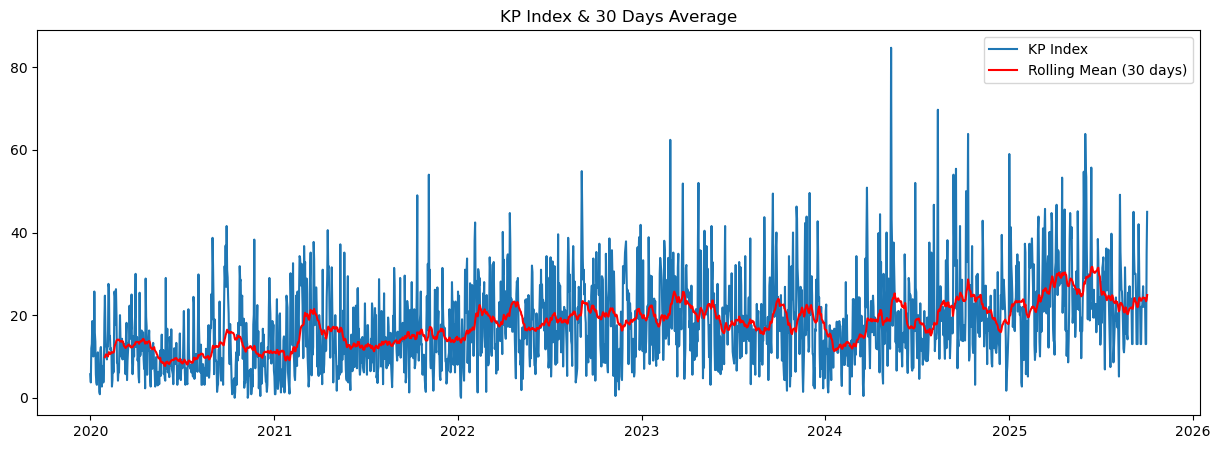

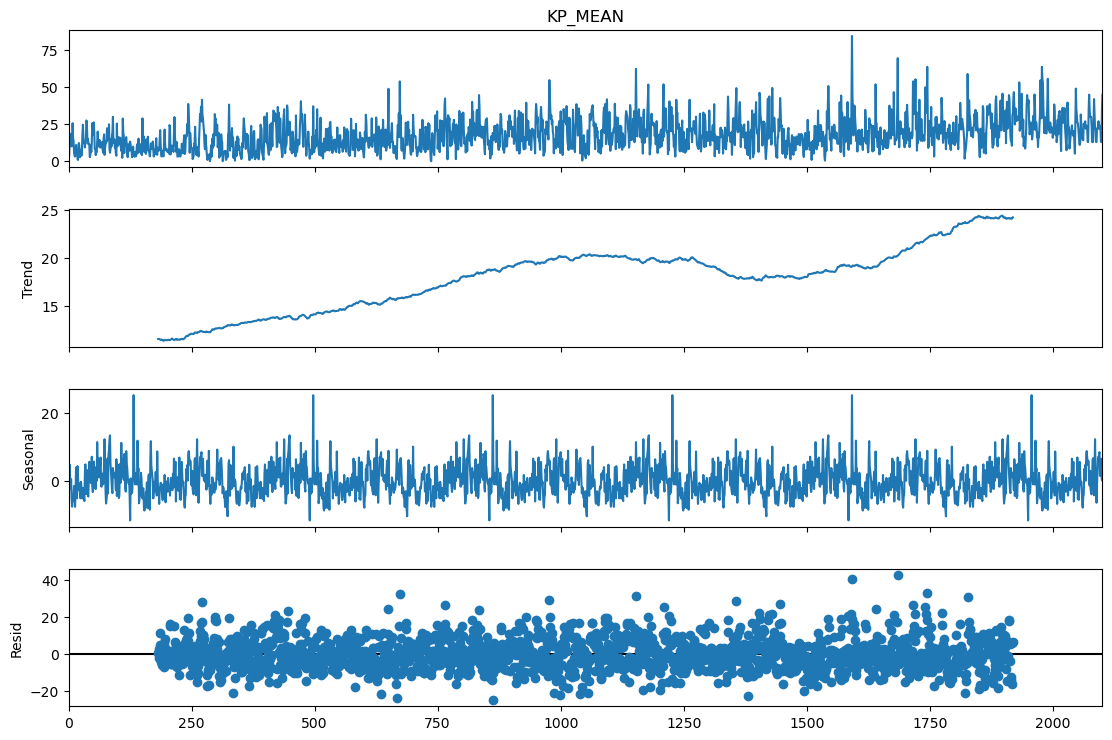

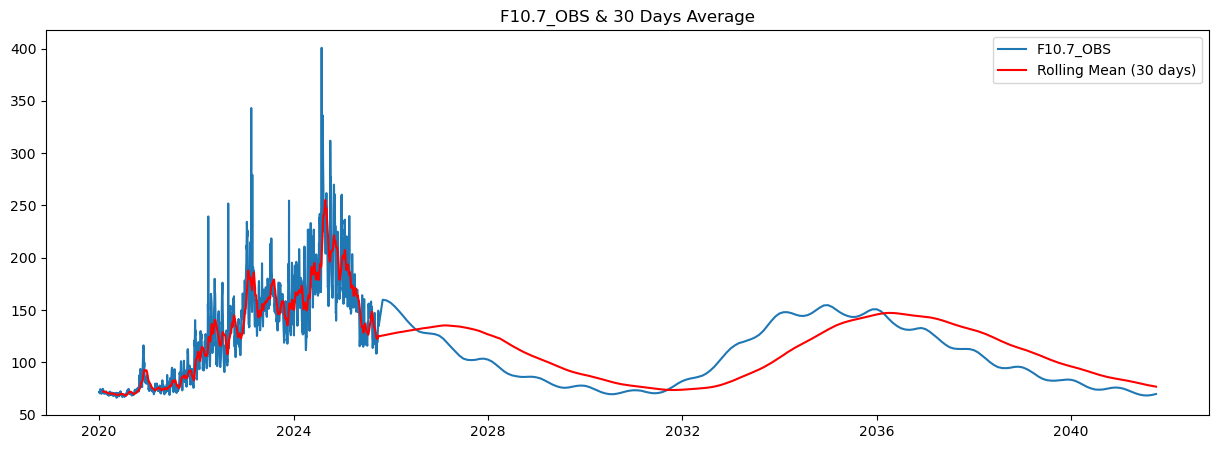

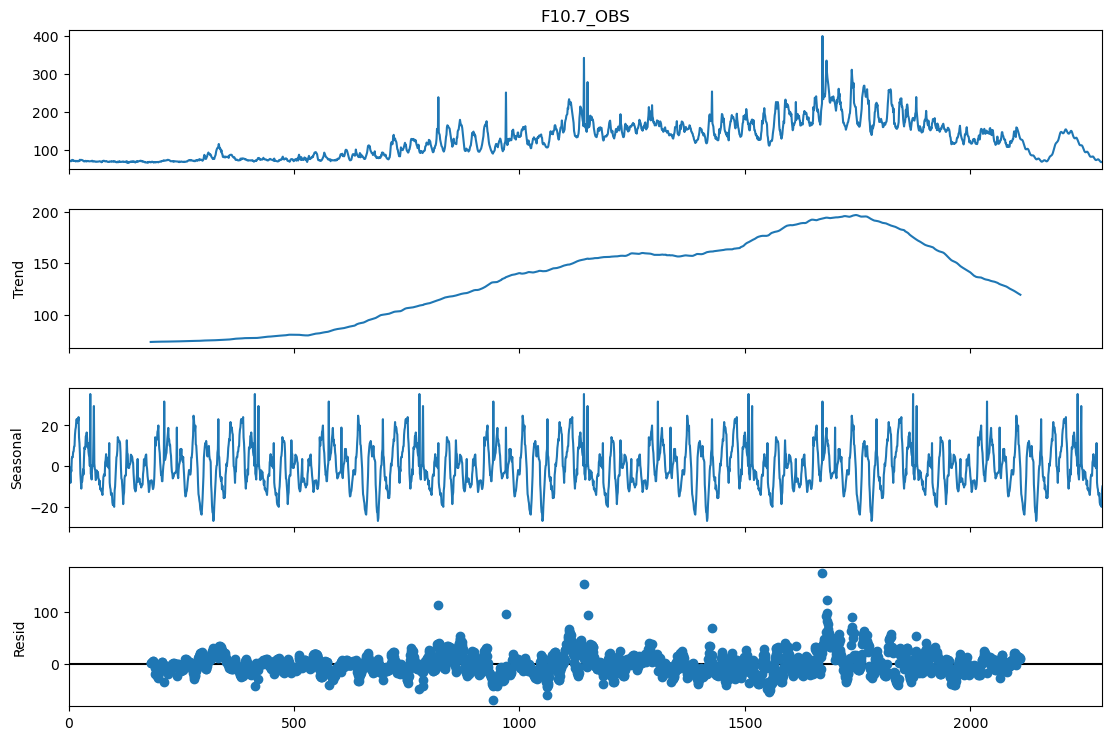

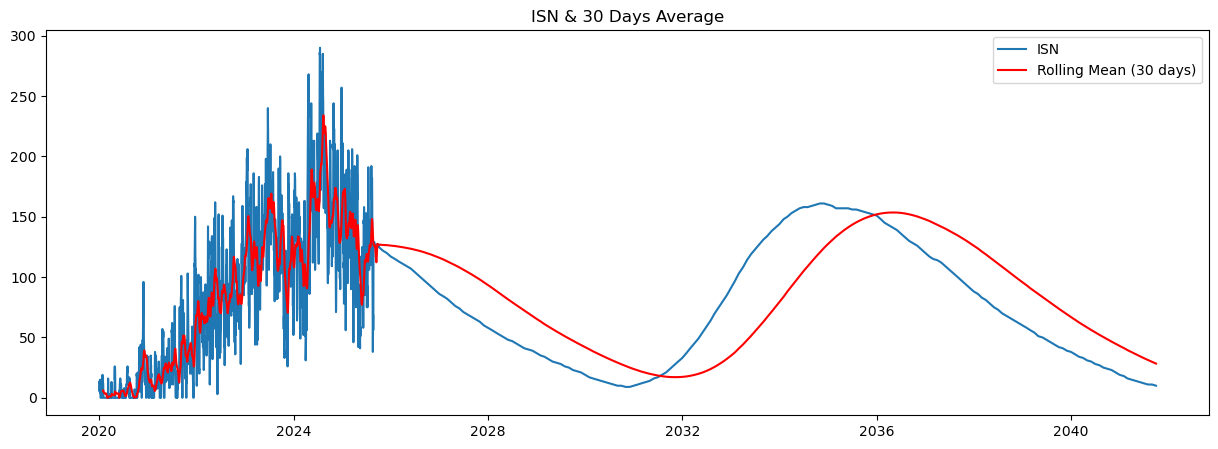

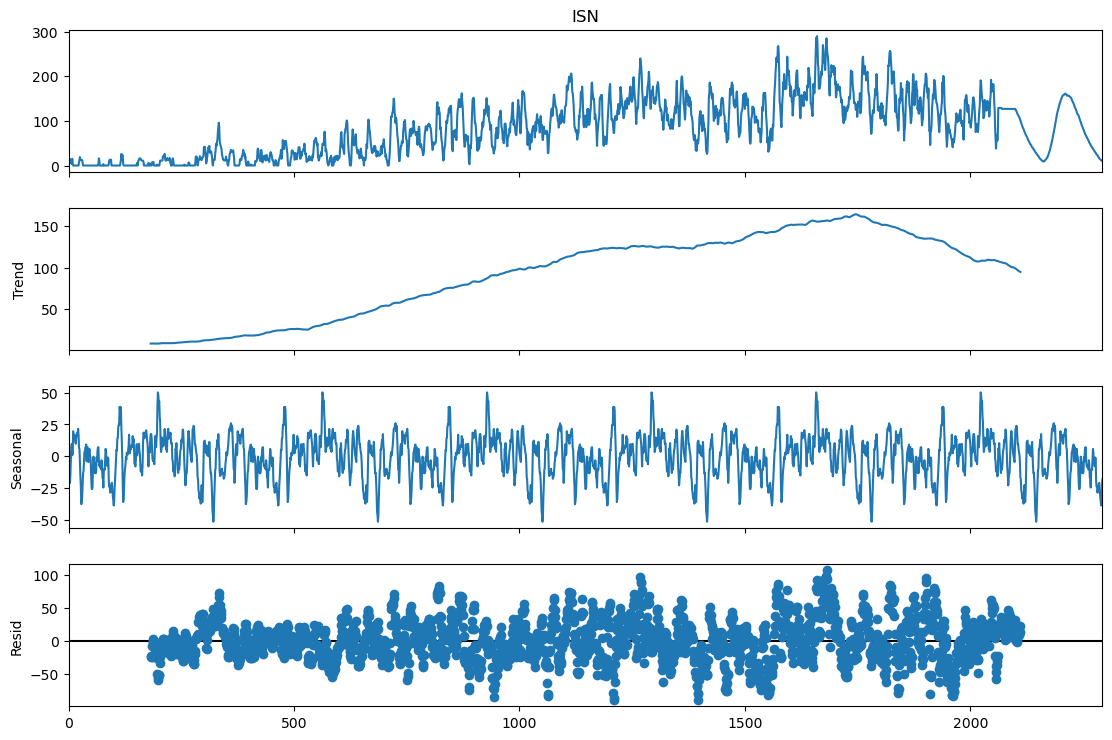

In [14]:

from statsmodels.tsa.seasonal import seasonal_decompose

plt.figure(figsize=(15, 5))
plt.plot(df['DATE'], df['KP_MEAN'], label='KP Index')
plt.plot(df['DATE'], df['KP_MEAN'].rolling(window=30).mean(), label='Rolling Mean (30 days)', color='red')
plt.title("KP Index & 30 Days Average")
plt.legend()
plt.show()


decompose_kp = seasonal_decompose(df['KP_MEAN'].dropna(), model='additive', period=365)  
fig = decompose_kp.plot()
fig.set_size_inches(12, 8)
plt.show()


for col in ['F10.7_OBS', 'ISN']:
    plt.figure(figsize=(15, 5))
    plt.plot(df['DATE'], df[col], label=col)
    plt.plot(df['DATE'], df[col].rolling(window=30).mean(), label='Rolling Mean (30 days)', color='red')
    plt.title(f"{col} & 30 Days Average")
    plt.legend()
    plt.show()

    decompose = seasonal_decompose(df[col].dropna(), model='additive', period=365)
    fig = decompose.plot()
    fig.set_size_inches(12, 8)
    plt.show()


In [15]:
for col in ["KP_MEAN", "ISN", "F10.7_RISK"]:
    for lag in [1, 3, 7]:  
        df[f"{col}_lag{lag}"] = df[col].shift(lag)


In [16]:
df.columns = df.columns.str.strip()
df = df.set_index("DATE")

df.index = pd.to_datetime(df.index)

numeric_cols = ["KP_MEAN", "ISN"]
monthly_features = df[numeric_cols].resample("M").agg(["mean","min","max"])
monthly_features.columns = ["_".join(col).strip() for col in monthly_features.columns]

df = df.join(monthly_features, how="left")


C:\Users\pelin\AppData\Local\Temp\ipykernel_17728\2767544971.py:7: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_features = df[numeric_cols].resample("M").agg(["mean","min","max"])


In [17]:
import pandas as pd


df = pd.read_csv("SW-Last5Years.csv")


print("Orijinal kolonlar:", df.columns.tolist())
df.columns = df.columns.str.strip()  


if "DATE" in df.columns:
    df['DATE'] = pd.to_datetime(df['DATE'], errors='coerce')
    df = df.set_index('DATE')
    print("DATE kolonunu datetime olarak ayarladık ✅")
else:
    print("Hala DATE kolonunu bulamadık. Kolonlar:", df.columns.tolist())


Orijinal kolonlar: ['DATE', 'BSRN', 'ND', 'KP1', 'KP2', 'KP3', 'KP4', 'KP5', 'KP6', 'KP7', 'KP8', 'KP_SUM', 'AP1', 'AP2', 'AP3', 'AP4', 'AP5', 'AP6', 'AP7', 'AP8', 'AP_AVG', 'CP', 'C9', 'ISN', 'F10.7_OBS', 'F10.7_ADJ', 'F10.7_DATA_TYPE', 'F10.7_OBS_CENTER81', 'F10.7_OBS_LAST81', 'F10.7_ADJ_CENTER81', 'F10.7_ADJ_LAST81']
DATE kolonunu datetime olarak ayarladık ✅


In [18]:

kp_cols = ['KP1','KP2','KP3','KP4','KP5','KP6','KP7']
df['KP_MEAN'] = df[kp_cols].mean(axis=1)


for col in ["KP_MEAN", "ISN", "F10.7_OBS"]:
    for lag in [1, 3, 7]:
        df[f"{col}_lag{lag}"] = df[col].shift(lag)


numeric_cols = ["KP_MEAN", "ISN", "F10.7_OBS"]
monthly_features = df[numeric_cols].resample("M").agg(["mean", "min", "max"])
monthly_features.columns = ["_".join(col).strip() for col in monthly_features.columns]


df = df.join(monthly_features, how="left")

print(df.head())


            BSRN  ND   KP1   KP2   KP3   KP4   KP5   KP6   KP7   KP8  ...  \
DATE                                                                  ...   
2020-01-01  2542  22   3.0   0.0   0.0   7.0   7.0  13.0  10.0   7.0  ...   
2020-01-02  2542  23   0.0   0.0   3.0   3.0   3.0   7.0  10.0  10.0  ...   
2020-01-03  2542  24   7.0  10.0  27.0  20.0  10.0   7.0   3.0  13.0  ...   
2020-01-04  2542  25  17.0   7.0   7.0   7.0  10.0  20.0  23.0  20.0  ...   
2020-01-05  2542  26  17.0  10.0  17.0  13.0  20.0  20.0  33.0  27.0  ...   

            F10.7_OBS_lag7  KP_MEAN_mean  KP_MEAN_min  KP_MEAN_max  ISN_mean  \
DATE                                                                           
2020-01-01             NaN           NaN          NaN          NaN       NaN   
2020-01-02             NaN           NaN          NaN          NaN       NaN   
2020-01-03             NaN           NaN          NaN          NaN       NaN   
2020-01-04             NaN           NaN          NaN       

C:\Users\pelin\AppData\Local\Temp\ipykernel_17728\4277905584.py:11: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_features = df[numeric_cols].resample("M").agg(["mean", "min", "max"])


In [22]:
!pip install prophet

   ---------------------------------------- 0.0/13.3 MB ? eta -:--:--
    --------------------------------------- 0.3/13.3 MB ? eta -:--:--
   - -------------------------------------- 0.5/13.3 MB 2.1 MB/s eta 0:00:07
   --- ------------------------------------ 1.0/13.3 MB 1.9 MB/s eta 0:00:07
   --- ------------------------------------ 1.3/13.3 MB 1.7 MB/s eta 0:00:07
   ---- ----------------------------------- 1.6/13.3 MB 1.6 MB/s eta 0:00:08
   ----- ---------------------------------- 1.8/13.3 MB 1.5 MB/s eta 0:00:08
   ----- ---------------------------------- 1.8/13.3 MB 1.5 MB/s eta 0:00:08
   ------- -------------------------------- 2.4/13.3 MB 1.4 MB/s eta 0:00:08
   ------- -------------------------------- 2.6/13.3 MB 1.5 MB/s eta 0:00:08
   --------- ------------------------------ 3.1/13.3 MB 1.5 MB/s eta 0:00:07
   ---------- ----------------------------- 3.4/13.3 MB 1.5 MB/s eta 0:00:07
   ----------- ---------------------------- 3.7/13.3 MB 1.5 MB/s eta 0:00:07
   ----------

In [28]:
df = df.reset_index()  
df["DATE"] = pd.to_datetime(df["DATE"])  


In [29]:
prophet_df = df.reset_index()[["DATE", "KP_MEAN"]].rename(columns={"DATE":"ds", "KP_MEAN":"y"})


18:09:35 - cmdstanpy - INFO - Chain [1] start processing
18:09:36 - cmdstanpy - INFO - Chain [1] done processing


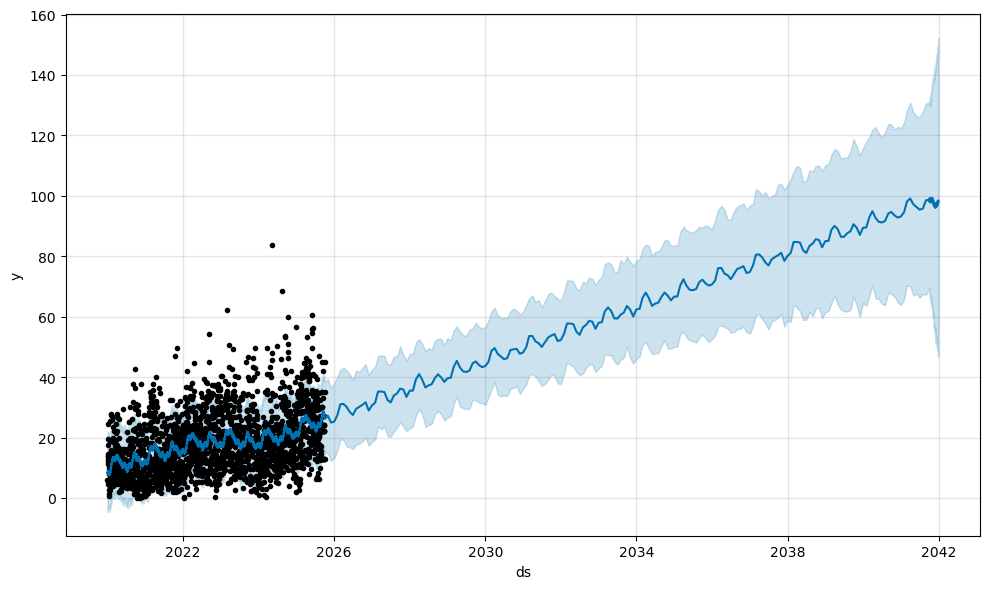

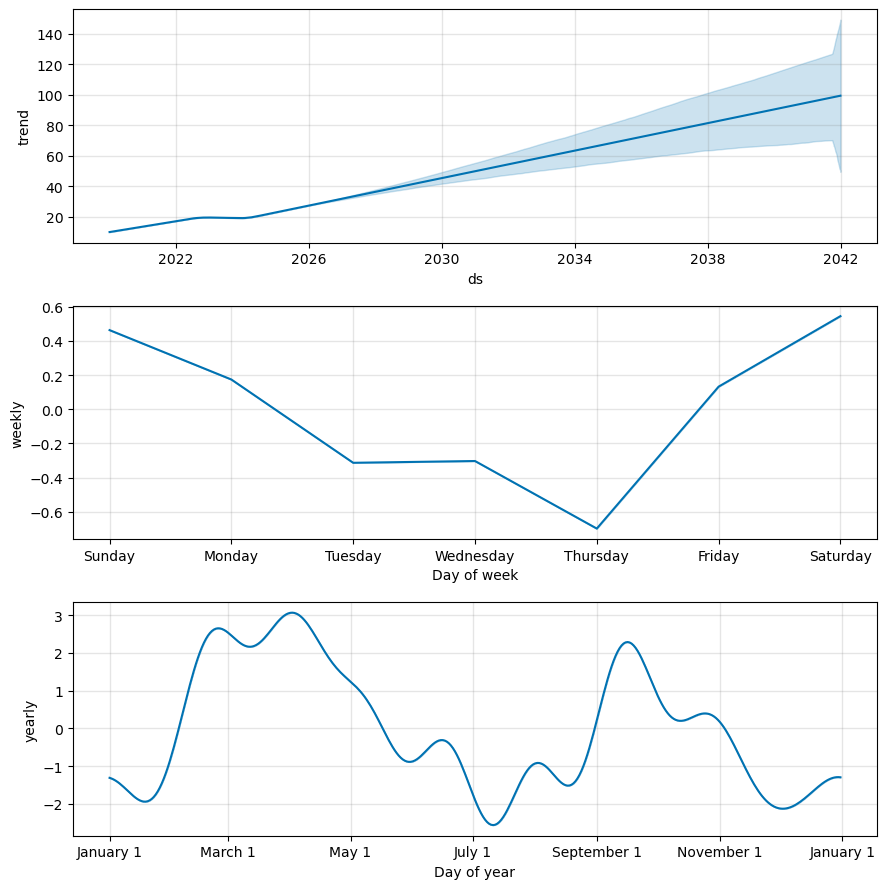

In [30]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt


df["DATE"] = pd.to_datetime(df["DATE"])
df = df.set_index("DATE")


kp_cols = ["KP1","KP2","KP3","KP4","KP5","KP6","KP7","KP8"]
df["KP_MEAN"] = df[kp_cols].mean(axis=1)


prophet_df = df.reset_index()[["DATE","KP_MEAN"]].rename(columns={"DATE":"ds", "KP_MEAN":"y"})


model = Prophet()
model.fit(prophet_df)


future = model.make_future_dataframe(periods=90)
forecast = model.predict(future)


fig1 = model.plot(forecast)
plt.show()


fig2 = model.plot_components(forecast)
plt.show()


18:20:32 - cmdstanpy - INFO - Chain [1] start processing
18:20:32 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 1200x500 with 0 Axes>

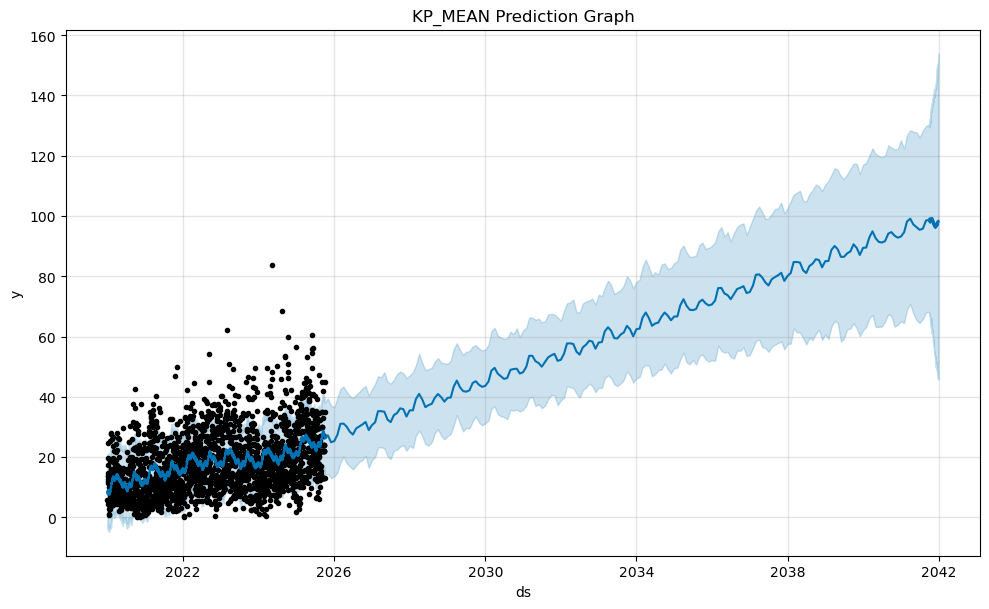

<Figure size 1200x500 with 0 Axes>

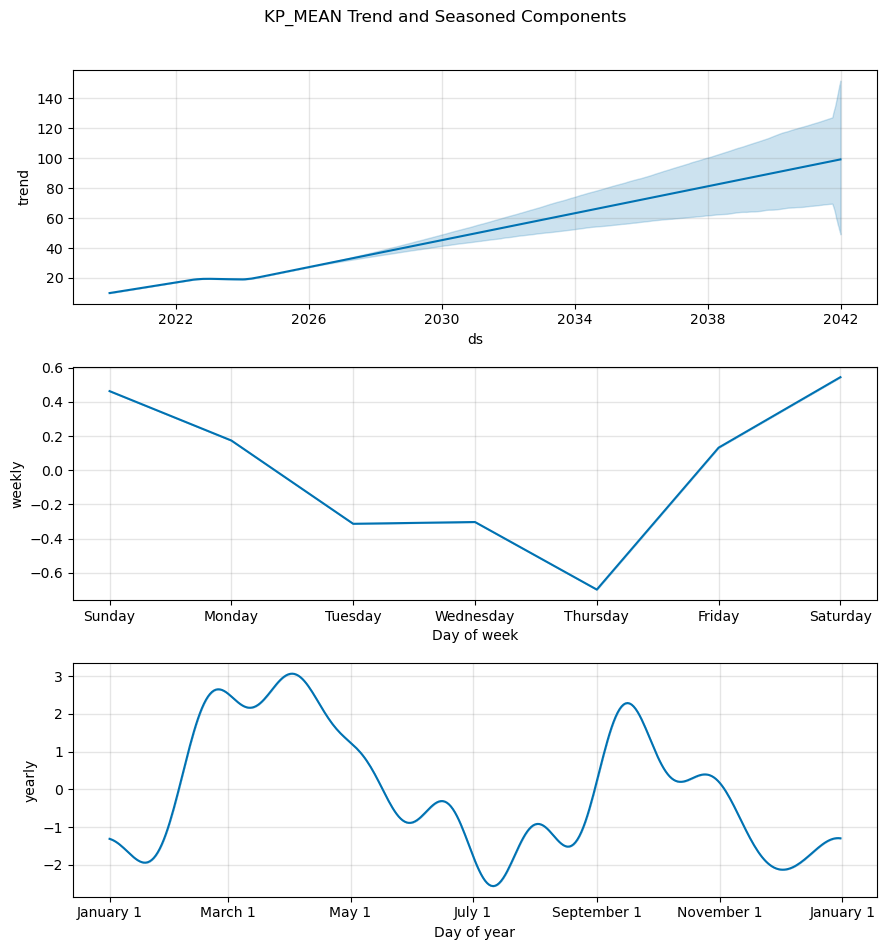

18:20:33 - cmdstanpy - INFO - Chain [1] start processing
18:20:33 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 1200x500 with 0 Axes>

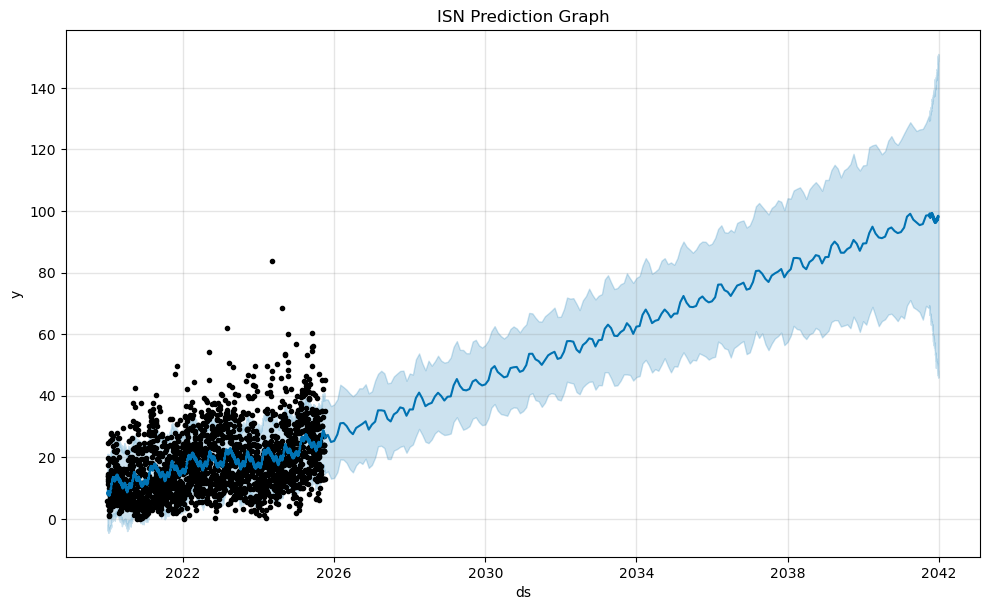

<Figure size 1200x500 with 0 Axes>

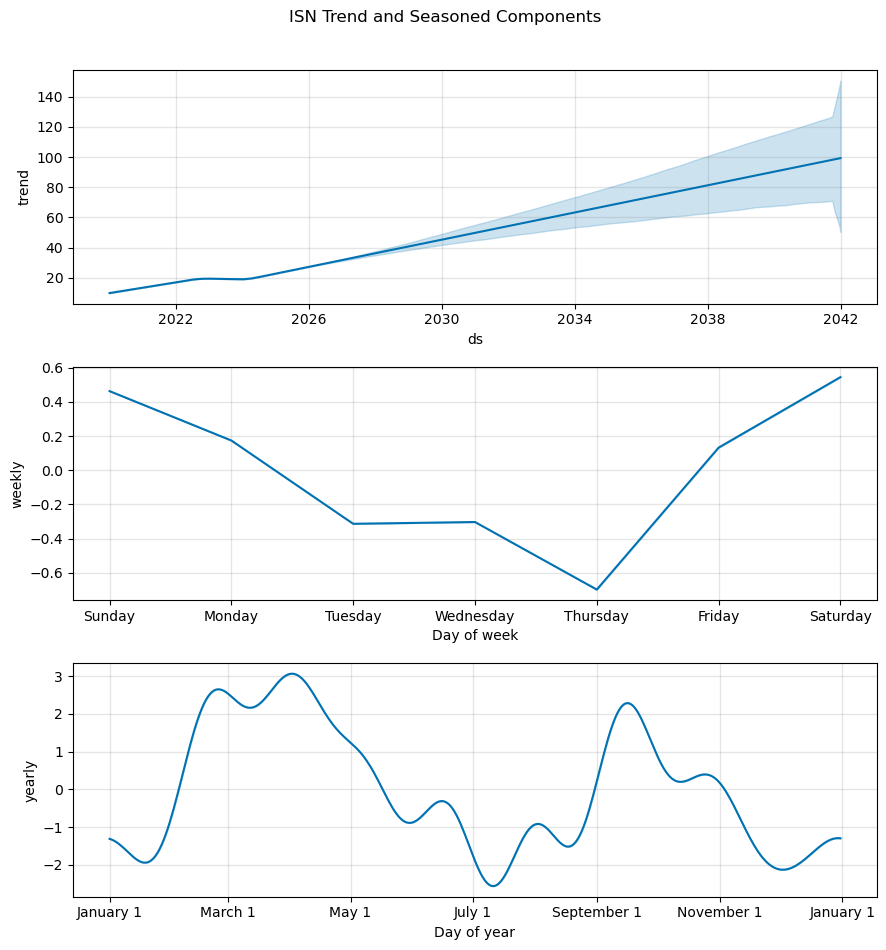

18:20:35 - cmdstanpy - INFO - Chain [1] start processing
18:20:35 - cmdstanpy - INFO - Chain [1] done processing


<Figure size 1200x500 with 0 Axes>

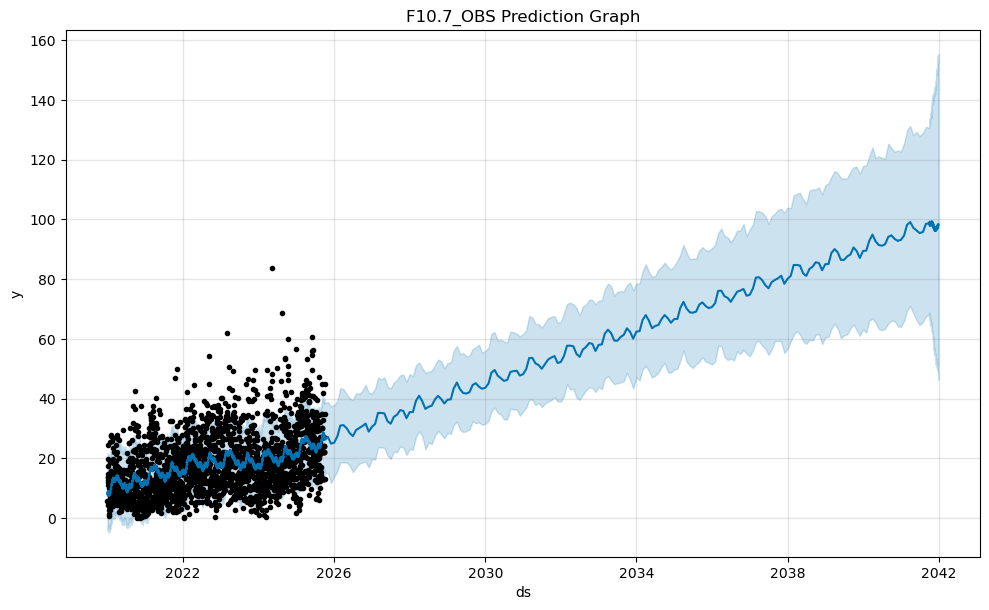

<Figure size 1200x500 with 0 Axes>

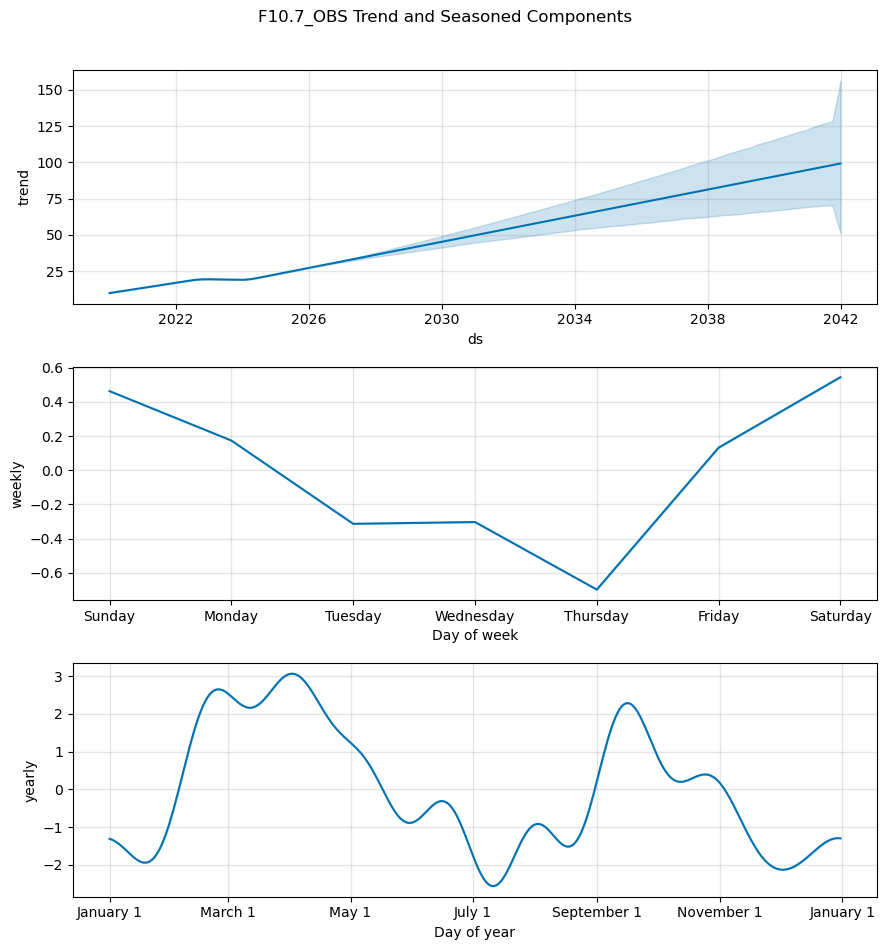

In [36]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt


kp_cols = ["KP1","KP2","KP3","KP4","KP5","KP6","KP7","KP8"]
df["KP_MEAN"] = df[kp_cols].mean(axis=1)


targets = ["KP_MEAN", "ISN", "F10.7_OBS"]

for target in targets:
    
    
    
    
    model = Prophet()
    model.fit(prophet_df)
    
    
    future = model.make_future_dataframe(periods=90)
    forecast = model.predict(future)
    
    
    plt.figure(figsize=(12,5))
    model.plot(forecast)
    plt.title(f"{target} Prediction Graph")
    plt.show()
    
    
    plt.figure(figsize=(12,5))
    model.plot_components(forecast)
    plt.suptitle(f"{target} Trend and Seasoned Components", y=1.05)
    plt.show()

